# Predicting stock price using Machine Learning Algorithm

***using linear regression predicting stock prices***
---------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [2]:
tesla = pd.read_csv('tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1540 non-null   object 
 1   Open       1540 non-null   float64
 2   High       1540 non-null   float64
 3   Low        1540 non-null   float64
 4   Close      1540 non-null   float64
 5   Adj Close  1540 non-null   float64
 6   Volume     1540 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 84.3+ KB


In [4]:
tesla['Date'] = pd.to_datetime(tesla['Date'],infer_datetime_format=True)
tesla = tesla.dropna()


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1540 non-null   datetime64[ns]
 1   Open       1540 non-null   float64       
 2   High       1540 non-null   float64       
 3   Low        1540 non-null   float64       
 4   Close      1540 non-null   float64       
 5   Adj Close  1540 non-null   float64       
 6   Volume     1540 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 84.3 KB


In [6]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1.540000e+03
mean,123.896896,126.174818,121.492325,123.888266,123.888266,4.259854e+06
std,94.292379,95.754398,92.733313,94.291466,94.291466,4.453856e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,29.185001,29.862501,28.530001,29.175000,29.175000,1.106175e+06
50%,122.235000,125.055001,119.539997,121.654999,121.654999,3.019500e+06
75%,217.932503,221.509998,214.727493,218.377499,218.377499,5.749150e+06
max,287.670013,291.420013,280.399994,286.040009,286.040009,3.716390e+07


In [8]:
import plotly.graph_objs as go

In [9]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data = [{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [10]:
type(layout)


plotly.graph_objs._layout.Layout

In [11]:
iplot(plot)

In [12]:
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [13]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [14]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

In [15]:
iplot(plot2)

In [44]:
type(trace0)

plotly.graph_objs._scatter.Scatter

In [16]:


scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.811438291565111	0.8164637520187662
MSE       1692.4985457506934	1590.7024692892949



In [17]:
testMean = np.mean(Y_test)
print(testMean)

121.76406941558453


In [18]:
mseTest = mse(Y_test, lm.predict(X_test))
print(mseTest)

1590.7024692892949


In [19]:
r2Test = r2_score(Y_test, lm.predict(X_test))
print(r2Test)

0.8164637520187662


In [20]:
mseTestPercentage = ((mseTest - testMean)/testMean) * 100
print (mseTestPercentage)

1206.3808370761478


In [21]:
r2TestPercent = r2Test*100
print(r2TestPercent)

81.64637520187662


In [22]:
percent_metric = np.array([
    ['metric','r2_score','mean squared error'],
    ['percentage',r2TestPercent,mseTestPercentage]
])
print(percent_metric)

[['metric' 'r2_score' 'mean squared error']
 ['percentage' '81.64637520187662' '1206.3808370761478']]


In [23]:
percent = f'''
{'Metric'.ljust(15)}{'r2_score'.center(20)}\t{'mean squared error'.center(20)}
{'Percentage(%)'.ljust(18)}{r2TestPercent}\t{mseTestPercentage}
'''
print(percent)


Metric               r2_score      	 mean squared error 
Percentage(%)     81.64637520187662	1206.3808370761478



#  --------------------------------------------------------------------------------------------------------

---------------

#  --------------------------------------------------------------------------------------------------------

***Implementing LSTM model for prediction of stock price***
---------------------------------------------------------------------------------------

In [24]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [25]:
trainData = tesla.iloc[:,4:5].values


In [26]:
 sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1540, 1)

In [27]:
0<= trainData.all() <= 1 

True

In [28]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [29]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [30]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [31]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 60, verbose=2)

Epoch 1/20
19/19 - 9s - loss: 0.0352 - 9s/epoch - 487ms/step
Epoch 2/20
19/19 - 4s - loss: 0.0053 - 4s/epoch - 209ms/step
Epoch 3/20
19/19 - 4s - loss: 0.0033 - 4s/epoch - 207ms/step
Epoch 4/20
19/19 - 4s - loss: 0.0032 - 4s/epoch - 228ms/step
Epoch 5/20
19/19 - 4s - loss: 0.0029 - 4s/epoch - 231ms/step
Epoch 6/20
19/19 - 4s - loss: 0.0029 - 4s/epoch - 218ms/step
Epoch 7/20
19/19 - 4s - loss: 0.0027 - 4s/epoch - 226ms/step
Epoch 8/20
19/19 - 4s - loss: 0.0028 - 4s/epoch - 234ms/step
Epoch 9/20
19/19 - 5s - loss: 0.0025 - 5s/epoch - 265ms/step
Epoch 10/20
19/19 - 4s - loss: 0.0037 - 4s/epoch - 235ms/step
Epoch 11/20
19/19 - 4s - loss: 0.0030 - 4s/epoch - 224ms/step
Epoch 12/20
19/19 - 4s - loss: 0.0024 - 4s/epoch - 222ms/step
Epoch 13/20
19/19 - 5s - loss: 0.0027 - 5s/epoch - 238ms/step
Epoch 14/20
19/19 - 5s - loss: 0.0024 - 5s/epoch - 247ms/step
Epoch 15/20
19/19 - 5s - loss: 0.0029 - 5s/epoch - 262ms/step
Epoch 16/20
19/19 - 5s - loss: 0.0038 - 5s/epoch - 239ms/step
Epoch 17/20
19/19

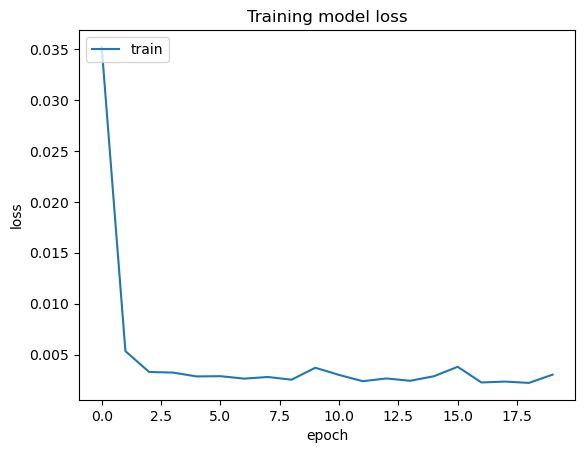

In [32]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [35]:
testData = pd.read_csv('tesla_TEST_DATA.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(593, 60, 1)

In [36]:
y_pred = model.predict(X_test)
y_pred

19/19 [==============================] - 2s 46ms/step


array([[0.6474336 ],
       [0.64615494],
       [0.643948  ],
       [0.6410973 ],
       [0.6379969 ],
       [0.63486713],
       [0.63171583],
       [0.6286108 ],
       [0.6254305 ],
       [0.622143  ],
       [0.61878794],
       [0.6155881 ],
       [0.61266714],
       [0.61008346],
       [0.60804987],
       [0.60679346],
       [0.60654026],
       [0.60736364],
       [0.6089974 ],
       [0.6110778 ],
       [0.61304176],
       [0.61441606],
       [0.61507183],
       [0.61503285],
       [0.61462814],
       [0.61418253],
       [0.6139357 ],
       [0.6140276 ],
       [0.61466724],
       [0.6159858 ],
       [0.61796135],
       [0.62060976],
       [0.6238789 ],
       [0.6278134 ],
       [0.6323478 ],
       [0.6373417 ],
       [0.6427318 ],
       [0.64859   ],
       [0.65491426],
       [0.66143876],
       [0.66779625],
       [0.6737421 ],
       [0.6793985 ],
       [0.6849039 ],
       [0.6903899 ],
       [0.69595736],
       [0.70156044],
       [0.707

In [41]:
predicted_price = sc.inverse_transform(y_pred)
new_pred = predicted_price +50

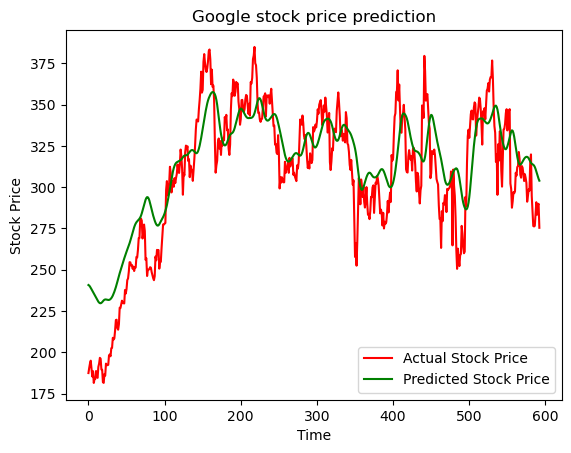

In [42]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(new_pred , color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

-----

-----

CONCLUSION
---------------------

**so as we saw LSTM gives more precise prediction for stock prices in compared to linear regression model**